In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

from tensorflow.keras.layers import Dense, Input, Embedding, Flatten, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD

In [2]:
df = pd.read_csv('data/ml-20m/ratings.csv')
df.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [3]:
df.userId = pd.Categorical(df.userId)
df['new_user_id'] = df.userId.cat.codes

In [4]:
df.movieId = pd.Categorical(df.movieId)
df['new_movie_id'] = df.movieId.cat.codes

In [5]:
user_ids = df['new_user_id'].values
movie_ids = df['new_movie_id'].values
ratings = df['rating'].values

In [6]:
# Get no. of users and no. of movies
N = len(set(user_ids))
M = len(set(movie_ids))

# Set embedding dimention
K = 10

In [7]:
# Make a Neural Network

# user input
u = Input(shape=(1,))

# movie input
m = Input(shape=(1,))

# user embedding
u_emb = Embedding(N,K)(u)   #Output = (num_samples,T,K) => (num_samples,1,K) as T(Time series length) is 1

# movie embedding
m_emb = Embedding(M,K)(m)

# Flatten both embeddings
u_emb = Flatten()(u_emb)   #Output = (num_samples,K)
m_emb = Flatten()(m_emb)

# Concatenate Flattened embedded inputs
x = Concatenate()([u_emb,m_emb])   # Output = (num_samples,2K)

x = Dense(1024, activation='relu')(x)
x = Dense(1)(x)

model = Model(inputs=[u,m], outputs=x)

In [8]:
model.compile(loss='mse', optimizer=SGD(learning_rate=0.08, momentum=0.9))

In [9]:
# Split the data
user_ids, movie_ids, ratings = shuffle(user_ids, movie_ids, ratings)
Ntrain = int(0.8*len(ratings))

train_user = user_ids[:Ntrain]
train_movie = movie_ids[:Ntrain]
train_ratings = ratings[:Ntrain]

test_user = user_ids[Ntrain:]
test_movie = movie_ids[Ntrain:]
test_ratings = ratings[Ntrain:]

# Center the ratings(Scaling the data)
avg_rating = train_ratings.mean()
train_ratings = train_ratings - avg_rating
test_ratings = test_ratings - avg_rating

In [10]:
r = model.fit(
    x = [train_user, train_movie],
    y = train_ratings,
    epochs=25,
    batch_size=1024,
    validation_data=([test_user, test_movie], test_ratings)
)

Epoch 1/25
15626/15626 [==============================] - 57s 4ms/step - loss: 0.7768 - val_loss: 0.7230
Epoch 2/25
15626/15626 [==============================] - 54s 3ms/step - loss: 0.7011 - val_loss: 0.6983
Epoch 3/25
15626/15626 [==============================] - 56s 4ms/step - loss: 0.6789 - val_loss: 0.6863
Epoch 4/25
15626/15626 [==============================] - 56s 4ms/step - loss: 0.6632 - val_loss: 0.6767
Epoch 5/25
15626/15626 [==============================] - 54s 3ms/step - loss: 0.6517 - val_loss: 0.6702
Epoch 6/25
15626/15626 [==============================] - 59s 4ms/step - loss: 0.6393 - val_loss: 0.6589
Epoch 7/25
15626/15626 [==============================] - 58s 4ms/step - loss: 0.6233 - val_loss: 0.6487
Epoch 8/25
15626/15626 [==============================] - 58s 4ms/step - loss: 0.6107 - val_loss: 0.6463
Epoch 9/25
15626/15626 [==============================] - 53s 3ms/step - loss: 0.6021 - val_loss: 0.6439
Epoch 10/25
15626/15626 [==============================

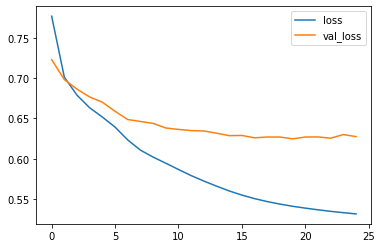

In [11]:
# Plot loss graph
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()